<a href="https://colab.research.google.com/github/sadjadasghari/Colab/blob/main/Copy_of_MLE_tech_assessment_Sample_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task A: Debugging exercise**

The following code performs Non Maximal Suppresion. The code is broken and has associated failing test cases.

The algorithm is as follows:
* Sort box indices by confidence scores
* Select the most confident box and add it to the selected boxes list
* Calculate IoU of the selected box with the rest of the boxes
* Filter out boxes with IoU greater than threshold


**Your task: Fix the bugs in the code and have all test case passing**

**Note: Assume the testing function has no bugs and works fine**

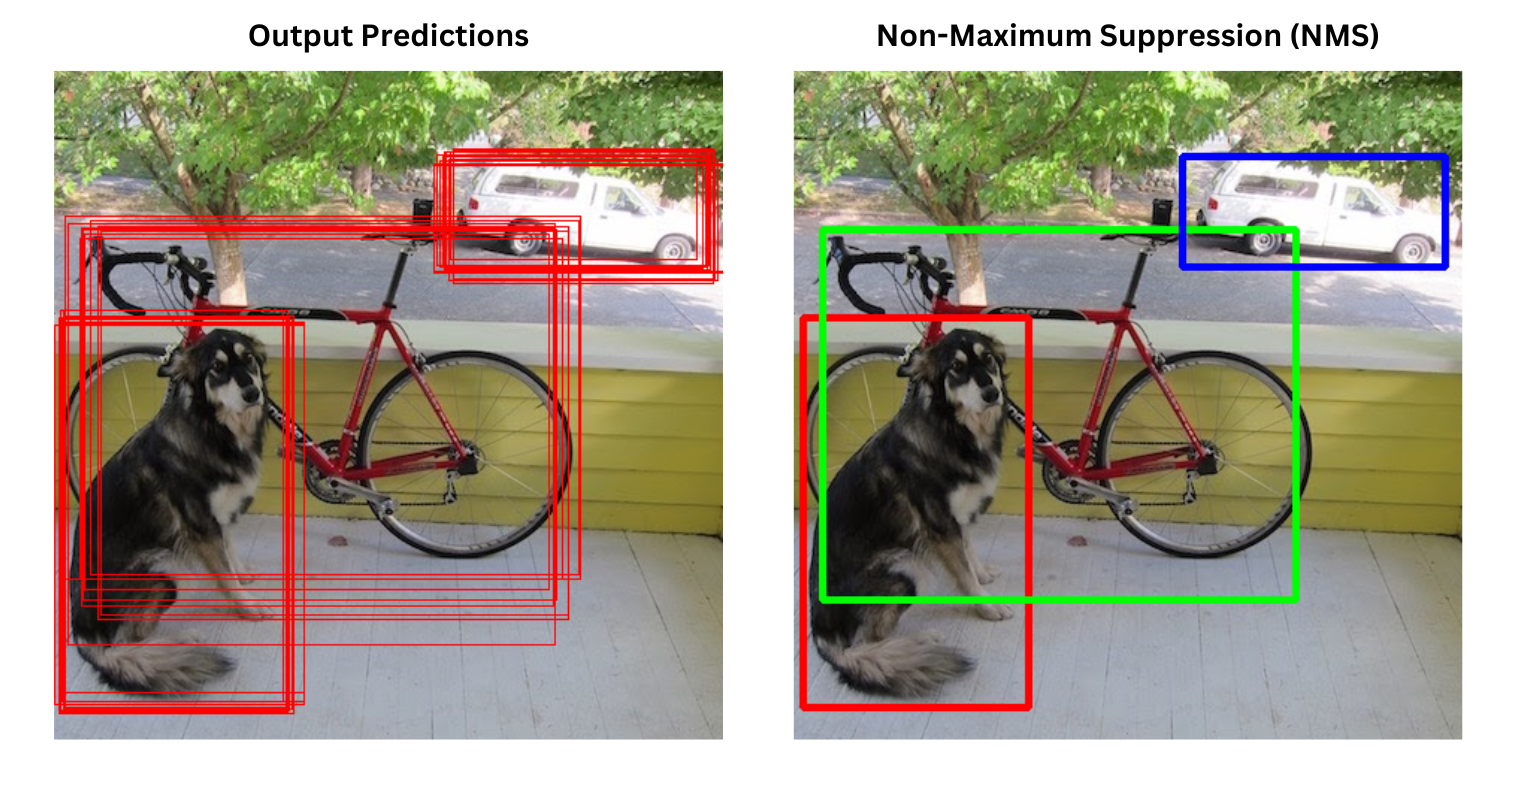

In [1]:
def bbox_nms(boxes, scores, threshold):
    """
    Apply non-maximal suppression to bounding boxes.

    Args:
    - boxes (list of tuples): List of bounding box coordinates in the format (x1, y1, x2, y2).
    - scores (list): List of confidence scores for each bounding box.
    - threshold (float): Intersection over Union (IoU) threshold for suppressing overlapping boxes.

    Returns:
    - List of indices of the selected bounding boxes after NMS.
    """
    if len(boxes) == 0:
        return []

    # Sort boxes by scores
    sorted_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)
    selected_indices = []
    while len(sorted_indices) > 0:
        last = len(sorted_indices) - 1
        selected_indices.append(sorted_indices[last])

        # Calculate IoU of the selected box with the rest of the boxes
        iou = [calculate_iou(boxes[sorted_indices[last]], boxes[j]) for j in sorted_indices[:last]]

        # Filter out boxes with IoU greater than threshold
        filtered_sorted_indices = []
        for j in range(last):
          if iou[j] >= threshold:
            filtered_sorted_indices.append((sorted_indices[j], iou[j]))
        sorted_indices = filtered_sorted_indices
    return selected_indices


In [8]:
# You may assume no bugs in the following section of the code.
def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) of two bounding boxes.
    IoU = A&B / A + B - A&B
    Args:
    - box1 (tuple): Coordinates of the first bounding box in the format (x1, y1, x2, y2).
    - box2 (tuple): Coordinates of the second bounding box in the format (x1, y1, x2, y2).

    Returns:
    - IoU value (float) between 0 and 1.
    """
    box1_width = box1[2] - box1[0]
    box1_height = box1[3] - box1[1]
    box1_area = box1_width * box1_height

    box2_width = box2[2] - box2[0]
    box2_height = box2[3] - box2[1]
    box2_area = box2_width * box2_height

    # is there any overlapping:
    if (box2[0] < box1[0] < box2[2] or box2[0] < box1[2] < box2[2]) and (box2[1] < box1[1] < box2[3] or box2[1] < box1[3] < box2[3] ):

    # overlapping area
    # overlap width = box1_x2 - box2_x1 or box2_x2 - box1_x1
      overlap_width = min(abs((box1[0] - box2[2])), abs((box2[0]-box1[2])))
      overlap_height = min(abs(box1[1] - box2[3]), abs((box2[1] - box1[3])))
      overlap_area = overlap_width * overlap_height

      return overlap_area/ (box1_area + box2_area - overlap_area)
    #if box1[0] < box2[0]:
    else:
      return 0


In [9]:

def test_bbox_nms():
    # Test case 1
    boxes1 = [(100, 100, 200, 200), (100, 100, 250, 250), (200, 200, 300, 300)]
    scores1 = [0.9, 0.8, 0.7]
    threshold1 = 0.4
    expected_indices1 = [0, 2]

    selected_indices1 = bbox_nms(boxes1, scores1, threshold1)
    print("Test Case 1 - Selected indices after NMS:", selected_indices1)
    print("Expected indices:", expected_indices1)
    print("Result:", "Passed" if selected_indices1 == expected_indices1 else "Failed")
    print()

    # Test case 2
    boxes2 = [(100, 100, 200, 200), (150, 150, 250, 250), (200, 200, 300, 300)]
    scores2 = [0.9, 0.8, 0.7]
    threshold2 = 0.3
    expected_indices2 = [0, 1, 2]

    selected_indices2 = bbox_nms(boxes2, scores2, threshold2)
    print("Test Case 2 - Selected indices after NMS:", selected_indices2)
    print("Expected indices:", expected_indices2)
    print("Result:", "Passed" if selected_indices2 == expected_indices2 else "Failed")
    print()

    # Test case 3 (Edge case: Single bounding box)
    boxes3 = [(100, 100, 200, 200)]
    scores3 = [0.9]
    threshold3 = 0.5
    expected_indices3 = [0]

    selected_indices3 = bbox_nms(boxes3, scores3, threshold3)
    print("Test Case 3 - Selected indices after NMS:", selected_indices3)
    print("Expected indices:", expected_indices3)
    print("Result:", "Passed" if selected_indices3 == expected_indices3 else "Failed")
    print()

test_bbox_nms()


Test Case 1 - Selected indices after NMS: [2]
Expected indices: [0, 2]
Result: Failed

Test Case 2 - Selected indices after NMS: [2]
Expected indices: [0, 1, 2]
Result: Failed

Test Case 3 - Selected indices after NMS: [0]
Expected indices: [0]
Result: Passed

